In [36]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow as tf
import numpy as np 
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

from sklearn.decomposition import PCA

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(x_train[0,0,0])}')
print(f'Label Element DType: {type(x_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {x_train.shape}')
print(f'Labels: {x_train.shape}')
print('Test Data:') 
print(f'Images: {x_test.shape}')
print(f'Labels: {x_test.shape}')
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.ndarray'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000, 28, 28)
Test Data:
Images: (10000, 28, 28)
Labels: (10000, 28, 28)
Image Data Range:
Min: 0
Max: 255


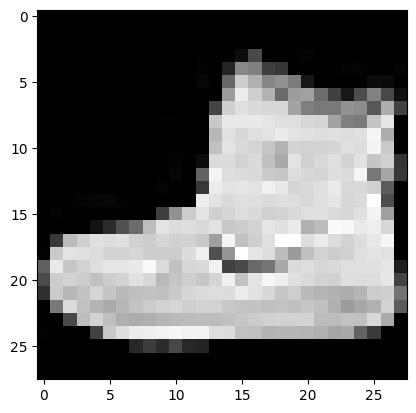

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

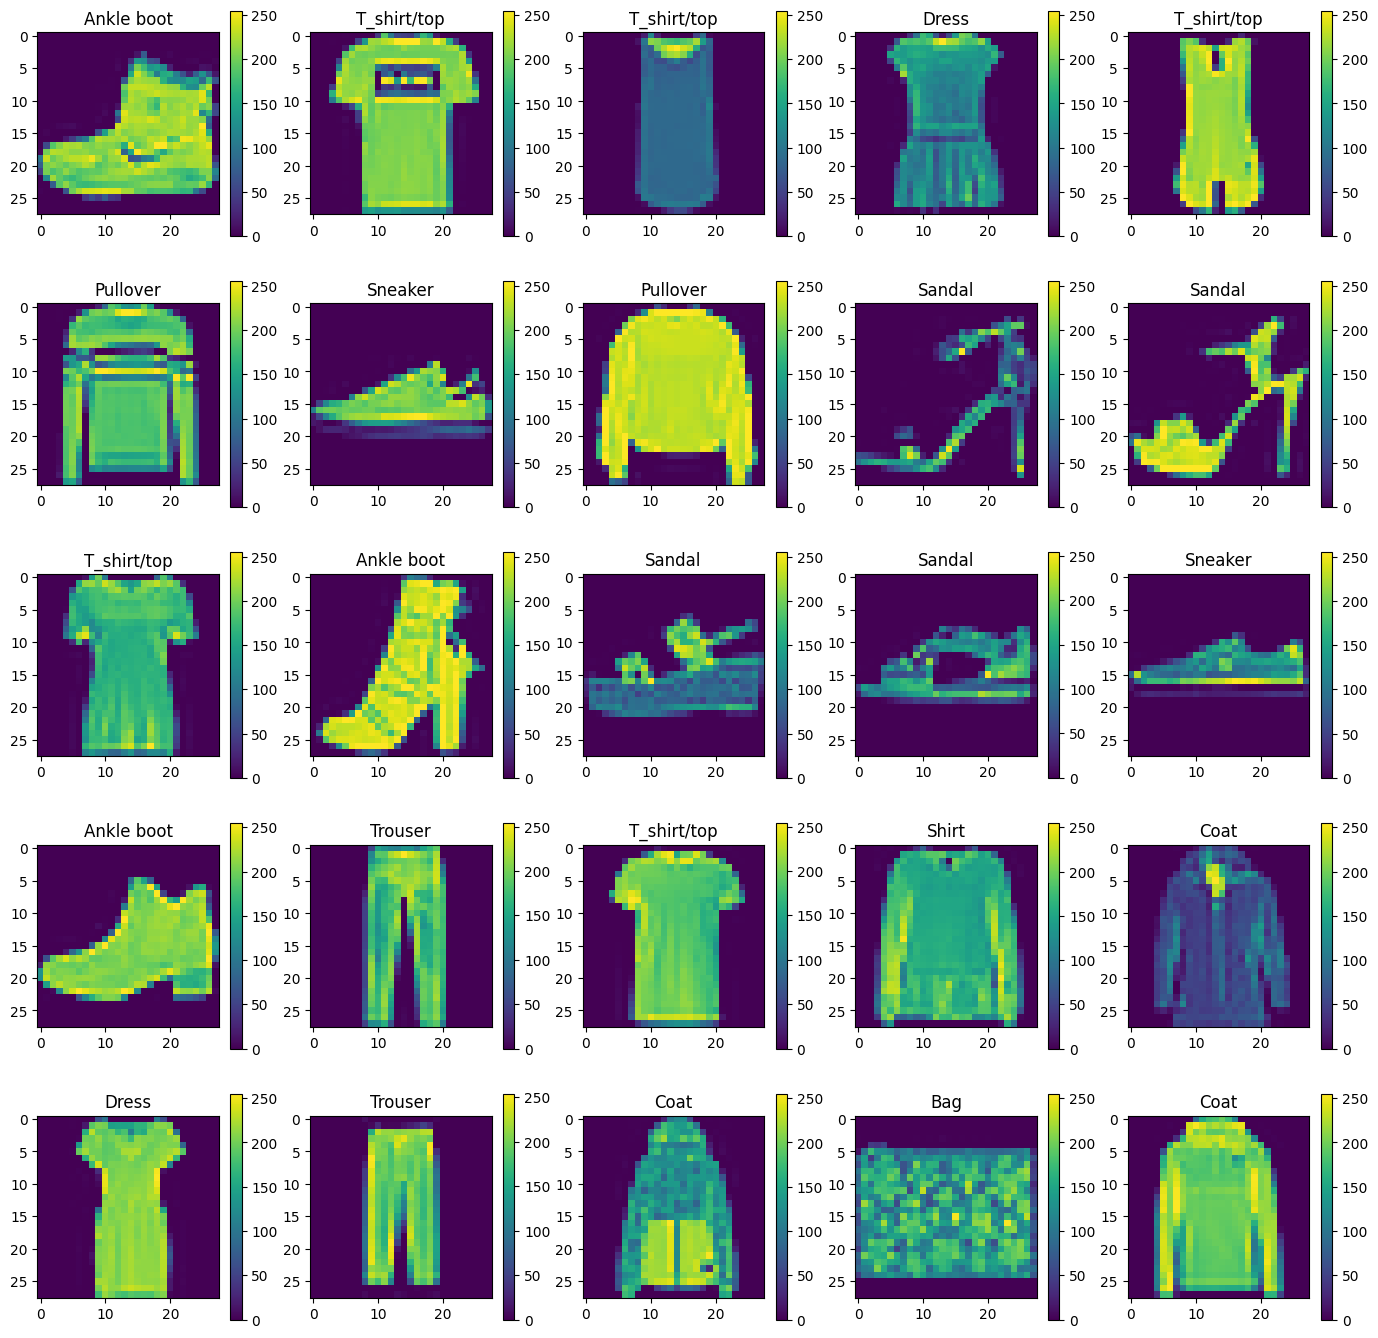

In [4]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    plt.colorbar()
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [19]:
train_images = x_train.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = x_test.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [20]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


In [22]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512,activation="sigmoid"),
    layers.Dense(10, activation="softmax")
    
])

2023-11-20 17:12:00.117190: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-11-20 17:12:00.117217: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-20 17:12:00.117228: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-20 17:12:00.117422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-20 17:12:00.117748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
y=model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
model.fit(train_images, y_train, epochs=5, batch_size=512)

Epoch 1/5


2023-11-20 17:13:52.007230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 3s 9ms/step - loss: 0.7537 - accuracy: 0.7277
Epoch 2/5
118/118 [==============================] - 1s 8ms/step - loss: 0.5092 - accuracy: 0.8120
Epoch 3/5
118/118 [==============================] - 1s 8ms/step - loss: 0.4440 - accuracy: 0.8358
Epoch 4/5
118/118 [==============================] - 1s 8ms/step - loss: 0.4053 - accuracy: 0.8501
Epoch 5/5
118/118 [==============================] - 1s 8ms/step - loss: 0.3793 - accuracy: 0.8589


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_test

In [28]:
test_loss, test_acc = model.evaluate(test_images, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.8415
Test accuracy: 84.15%


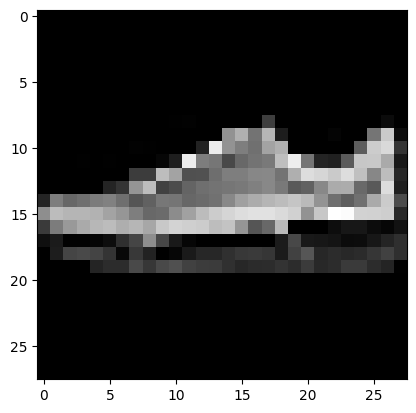

In [26]:
plt.imshow(test_images[9].reshape(28,28), cmap='gray')

In [29]:
prediction = model.predict(test_images)  # the notation `[0:1]` is used to get the first element of the array, but in the desired shape of (None, 784). `None` in Tensorflow means any number of elements, and is used to indicate that the shape is dynamic (i.e. it can be any number of instances)  

313/313 [==============================] - 1s 1ms/step


In [49]:
prediction = np.argmax(prediction, axis=1)

In [50]:
y_test_int = np.argmax(y_test, axis=1)

In [51]:
conf_matrix = confusion_matrix(y_test_int, prediction)


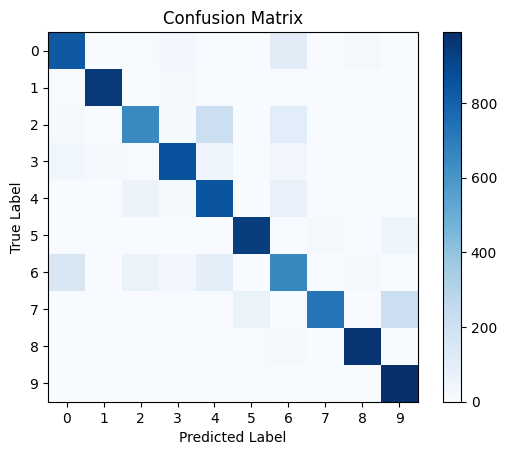

In [52]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
class_report = classification_report(np.argmax(y_test, axis=1), prediction, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.83      0.65      0.73      1000
           3       0.88      0.86      0.87      1000
           4       0.70      0.85      0.76      1000
           5       0.92      0.94      0.93      1000
           6       0.65      0.65      0.65      1000
           7       0.97      0.72      0.83      1000
           8       0.95      0.97      0.96      1000
           9       0.79      0.99      0.88      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

